<a href="https://colab.research.google.com/github/sudeep-sp/PyTorch/blob/main/NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example classification problems

1. " is this email spam or not spam? " Binary classification (one thing or another)
2. " Is this a photo of sushi, steak or pizza? "Multiclass classification (more than one thing or another)
3. " What tags should this article have? "Multiple Classification (multiple lable options per sample)

# architecture of a classification model

**Binary classification**

* **input layer shape(in_feature)** : same as number of features(e.g 5 for age, sex, height, weight, smoking status in heart disease prediction)

* **Hidden layer(s)** : Problem specific, minimum = 1 , maximum = unlimited

* **Neurons per hidden layer** : Problem specific, generally 10 to 512

* **output layer shape (out_feature)**: one (one class or other)

* **hidden layer activation**: usually ReLU but can be others

* **Output activation**: Sigmod(`torch.sigmod`)

* **loss function**: binary crossentropy (`torch.nn.BCELoss`)

* **Optimizer** : SGD (stochastic gradient descent), Adam


**Multiclass classification**

* **input layer shape(in_feature)** : same as number of features(e.g 5 for age, sex, height, weight, smoking status in heart disease prediction)

* **Hidden layer(s)** : Problem specific, minimum = 1 , maximum = unlimited

* **Neurons per hidden layer** : Problem specific, generally 10 to 512

* **output layer shape (out_feature)**: one per class(eg. 3 for food, person or dog photos)

* **hidden layer activation**: usually ReLU but can be others

* **Output activation**: Softmax(`torch.softmax`)

* **loss function**: Cross entropy (`torch.nn.CrossEntropyLoss`)

* **Optimizer** : SGD (stochastic gradient descent), Adam

# 1. make classification data and get it ready

In [153]:
import sklearn

In [154]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise=.03,
                    random_state=42)

In [155]:
len(X), len(y)

(1000, 1000)

In [156]:
print(f'first 5 samples of X {X[:5]}')
print(f'first 5 samples of y {y[:5]}')

first 5 samples of X [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y [1 1 1 1 0]


In [157]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:,1],
                        'label': y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


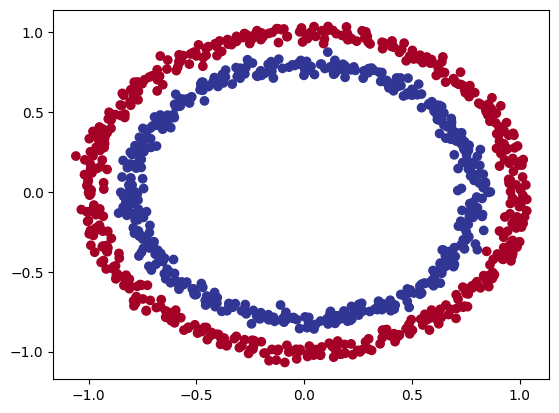

In [158]:
#visualize

import matplotlib.pyplot as plt

plt.scatter(x = X[:,0],
            y = X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu)

## 1.1 check input and output shapes

In [159]:
X.shape, y.shape

((1000, 2), (1000,))

In [160]:
# view the first example of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shape for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y:()


## 1.2 Turn data into tensor and create train and test splits

In [161]:
import torch

In [162]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [163]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [164]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [165]:
torch.manual_seed(42)

In [166]:
#Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y ,
                                                    test_size= 0.2, # 20% of data will be test and 80% will be train
                                                    random_state=42
                                                    )

In [167]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [168]:
n_samples

1000

# 2. Building a model

let's build a model to classify our blue and red dots.

we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. construct a model(by subclassing `nn.Model`)
3. define a loss function and optimizer
4. create a training and test loop

In [169]:
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [170]:
#1. constructor a model that subcalsses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data

    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # (x) --> layer_1 --> layer 2 --> output

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [171]:
## lets replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [172]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [173]:
## Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Lenghth of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\n First 10 predictions:\n {untrained_preds[:10]}')
print(f'\n First 10 labels : \n {y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Lenghth of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

 First 10 labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 setup loss function and optimizer

which loss function or optimizer should we use?

it depends on the problem specific.

e.g. fro regression you might want MAE or MSE (mean absolute error or mean squared error).

for classification we can use binary cross entropy or categorical cross entropy( cross entropy).

* `torch.nn.BECWithLogitsLoss` binary cross entropy
* logit in DL
* `torch.optim` SGD and Adam

In [174]:
# setup the loss function
# loss_fn = nn.BCELoss()# BCELoss = requires input to have gone through the sigmod activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in


optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [175]:
## claculate accuratcy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# train model

1. Forward Pass
2. Calculate the loss
3. Optimizer zero
4. Loss backward (backpropageation)
5. Optimizer step (gradient descent)

### 3.1 going from raw logits -> prediction probabilities -> prediction labels

Our model output are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. `sigmod `for binary classification and `softmax` for multiclass classification)

Then we can convert our models prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [176]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [177]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [178]:
# use the sigmod fn on logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
# y_pred_probs = torch.softmax(y_logits, dim=1)


y_pred_probs



tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [179]:
#find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equaility
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get red of extra dim
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [180]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

##3.2 building a training and testing loop

In [181]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set teh number of epochs
epochs = 100

#Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ##training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred label

  #2. Calculate loss/ accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),## nn.BCELoss expects predicition probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, ## nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4.Loss backward (backpropagation)
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ##testing

  model_0.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))


    #2. calculate test loss / acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)

    #print out whats happening
    if epochs % 10 == 0:
      print(f'epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss : {test_loss:.5f}, Test acc: {test_acc:.2f}%')

epoch:0 | Loss: 0.69796, Acc: 51.88% | Test Loss : 0.69440, Test acc: 58.00%
epoch:1 | Loss: 0.69767, Acc: 51.88% | Test Loss : 0.69420, Test acc: 57.50%
epoch:2 | Loss: 0.69741, Acc: 52.00% | Test Loss : 0.69401, Test acc: 56.50%
epoch:3 | Loss: 0.69716, Acc: 52.00% | Test Loss : 0.69385, Test acc: 56.50%
epoch:4 | Loss: 0.69694, Acc: 51.50% | Test Loss : 0.69370, Test acc: 56.00%
epoch:5 | Loss: 0.69673, Acc: 51.25% | Test Loss : 0.69356, Test acc: 56.00%
epoch:6 | Loss: 0.69654, Acc: 51.38% | Test Loss : 0.69344, Test acc: 56.50%
epoch:7 | Loss: 0.69636, Acc: 51.25% | Test Loss : 0.69333, Test acc: 56.50%
epoch:8 | Loss: 0.69619, Acc: 51.38% | Test Loss : 0.69323, Test acc: 55.00%
epoch:9 | Loss: 0.69604, Acc: 51.25% | Test Loss : 0.69314, Test acc: 54.00%
epoch:10 | Loss: 0.69590, Acc: 51.25% | Test Loss : 0.69305, Test acc: 53.00%
epoch:11 | Loss: 0.69577, Acc: 51.12% | Test Loss : 0.69298, Test acc: 52.00%
epoch:12 | Loss: 0.69564, Acc: 51.12% | Test Loss : 0.69291, Test acc: 52.

## 4. Make prediction and evaluate the model

In [182]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_function.py exist')
else:
  print('download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_function.py exist


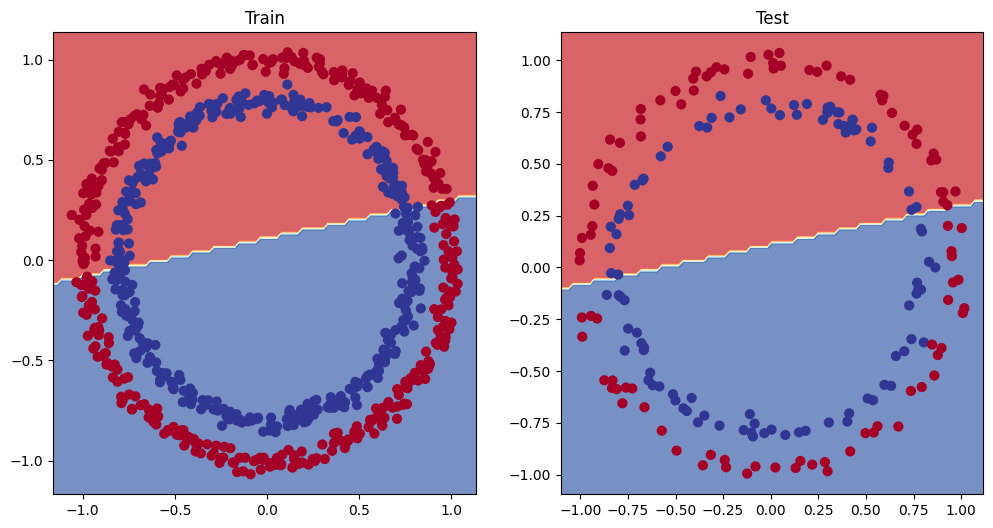

In [183]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

# 5. improvment
* Add more layers
* Add more hidden units
* fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

In [184]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [185]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [186]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [187]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [188]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


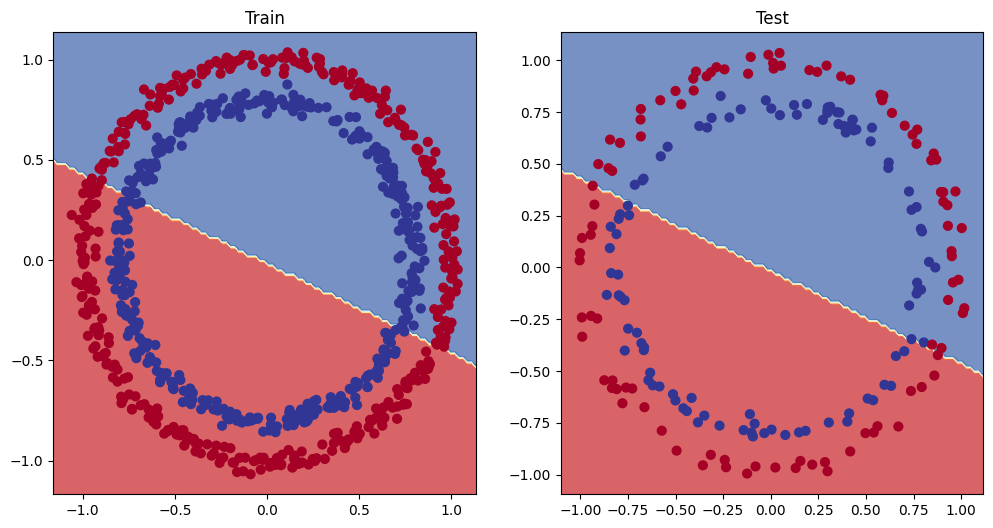

In [189]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can model a straight line

In [190]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [191]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


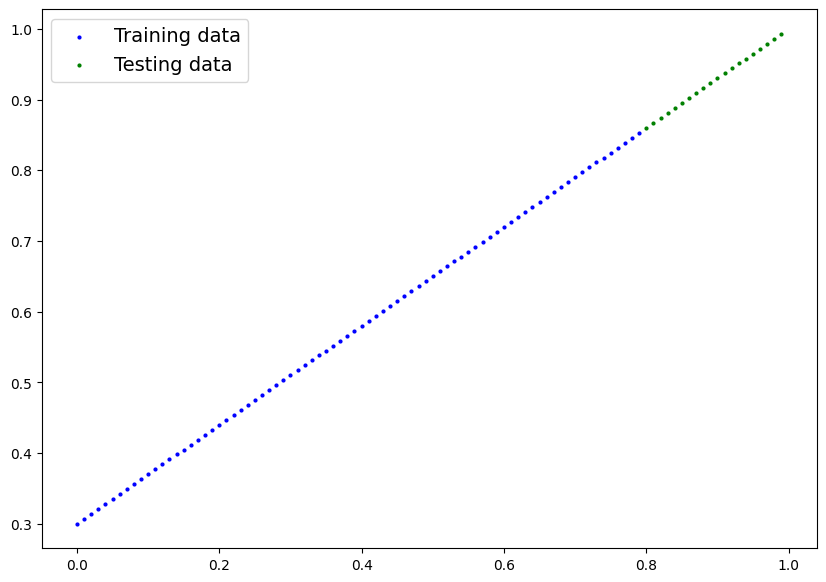

In [192]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [193]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [194]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [195]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


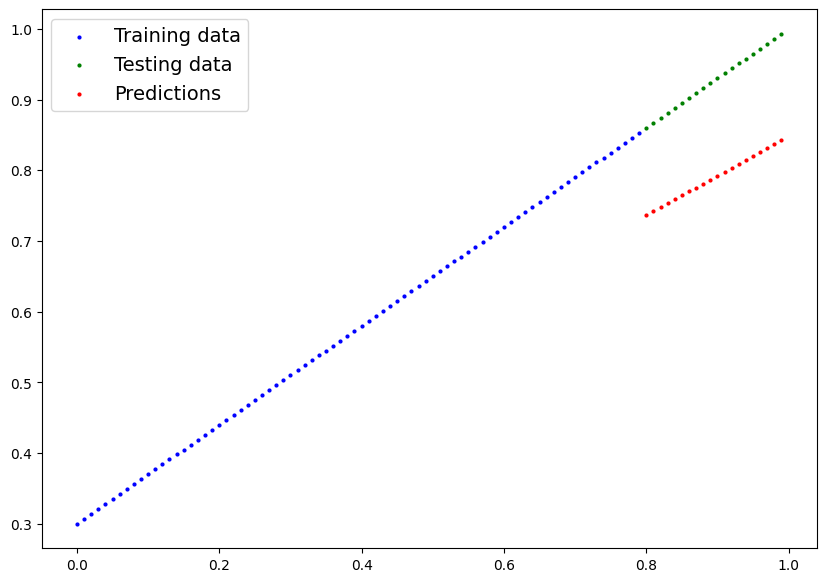

In [196]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

# non linearity

In [206]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [209]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [210]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 100 | Loss: 0.68516, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 200 | Loss: 0.68101, Accuracy: 52.75% | Test Loss: 0.67940, Test Accuracy: 56.50%
Epoch: 300 | Loss: 0.67513, Accuracy: 54.50% | Test Loss: 0.67283, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.66656, Accuracy: 58.38% | Test Loss: 0.66318, Test Accuracy: 59.00%
Epoch: 500 | Loss: 0.65154, Accuracy: 64.00% | Test Loss: 0.64751, Test Accuracy: 67.50%
Epoch: 600 | Loss: 0.62351, Accuracy: 74.00% | Test Loss: 0.62135, Test Accuracy: 79.00%
Epoch: 700 | Loss: 0.56796, Accuracy: 87.88% | Test Loss: 0.57360, Test Accuracy: 86.50%
Epoch: 800 | Loss: 0.48123, Accuracy: 93.50% | Test Loss: 0.49908, Test Accuracy: 90.50%
Epoch: 900 | Loss: 0.37024, Accuracy: 97.75% | Test Loss: 0.40565, Test Accuracy: 92.00%


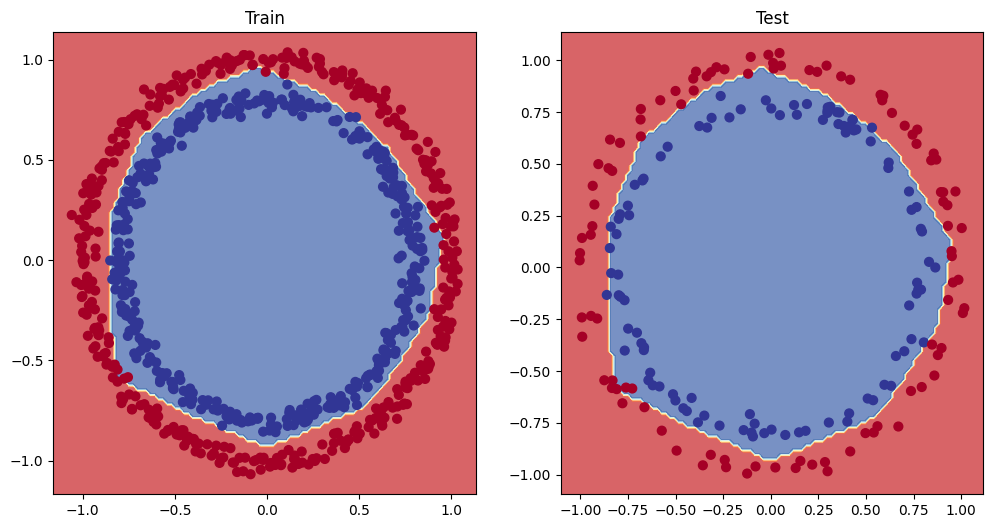

In [211]:
#Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)